# 2022 NZMSA Data Science Submission.

In [168]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [169]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,01/01/2015 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,01/01/2015 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,01/01/2015 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,01/01/2015 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,01/01/2015 02:00,21.0,12.0,56.38,16.0,NaN,NaN


### Numerically:

In [170]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [171]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


From the above, we can see eight data columns in the dataset ("weather-data"). Among them, six are numeric data: (tmpc, dwpc, relh, sknt, gust, peak_wind_drct); the rest are object data types. There are 103713 lines in this dataset, except Acronym for the place of data capture("station") and Date and time of capture("valid") columns; all other columns contain null values; all values in Peak Wind Gust Direction("peak_wind_drct") are null values. For those columns classified as numeric data, we are able to calculate their mean, standard deviation, 25th percentile value, and 75th percentile value. As we have already found, all values in Peak Wind Gust Direction("peak_wind_drct") are null, and the above information is not available for Peak Wind Gust Direction. <br>

1. Mean - Average value of the data. <br>
The mean(average) temperature of the environment (tmpc) is 15.82 celsius, with a range of 29.00 celsius to 2.00 celsius. <br>
The mean temperature of the dew point in the environment (dwpc) is 12.12 celsius, where the highest temperature is 23.00 celsius, and the lowest is -2.00 celsius. <br>
The mean relative humidity of the environment (relh) is 79.78%, and the relative humidity range is between 29.23% and 100.00%. <br>
The wind speed (sknt) is between 0.00 knots and 42.00 knots, with a mean of 8.92 knots. <br>
The wind gust (gust) is between 13.00 and 56.00 knots, with a mean of 30.96. <br>

2. Standard Deviation - How far away from the mean is the overall data? <br>
The standard deviation of the temperature of the environment is 4.24. <br>
The standard deviation of the temperature of the dew point in the environment is 3.74. <br>
The standard deviation of relative humidity of the environment is 12.56. <br>
The standard deviation of the wind speed is 5.35. <br>
The standard deviation of the wind gust is 6.32. <br>
Comparing the above standard deviations with the data means and ranges, we can conclude that the standard deviations are all relatively low, which means data are clustered around the mean. <br>

3. Percentile range (25th and 75th). <br>
25% of the environment's temperature is under 13.00 celsius, and 75% is above 16.00 celsius. <br>
25% of the temperature of the dew point is under 9.00 celsius, and 75% of the temperature is above 12.00 celsius. <br>
25% of the relative humidity of the environment is under 71.45%, and 75% of the relative humidity is above 81.99%. <br>
25% of the wind speed is under 5.00 knots, and 75% of the speed is above 8.00 knots. <br>
25% of the wind gust is under 27.00 knots, and 75% of the wind gust is above 31.00 knots. <br>

<AxesSubplot:>

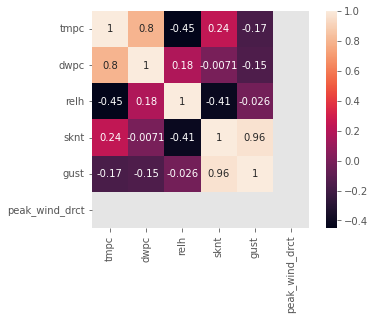

In [172]:
#correlation plot
sns.heatmap(dataset.corr(), annot=True, square=True)

The correlation coefficient measures the strength of the relationship between two variables. The two variables have no relationship for a correlation coefficient of 0 (or approaching 0), while with a correlation coefficient approaching +1/-1, the two variables have a strong relationship. From the graph above, we can see that the relationship between "gust" and "sknt" has a correlation coefficient of 0.96, which indicates a strong relationship between wind gust and wind speed. "dwpc" and "tmpc" has a correlation coefficient of 0.8, which is also a strong correlation, the temperature of the dew point in the environment and temperature of the environment are strongly positively correlated. The correlation coefficients of the rest of the relations between pairs are all between +.5 and -.5, which indicates that they are weakly (or not) correlated. As there is no data for peak wind gust direction ("peak_wind_drct"), we cannot calculate the correlation coefficient between peak wind gust direction and other variables. 

### Graphically:

C:\Users\lingx\AppData\Local\Temp\ipykernel_66496\1827131232.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


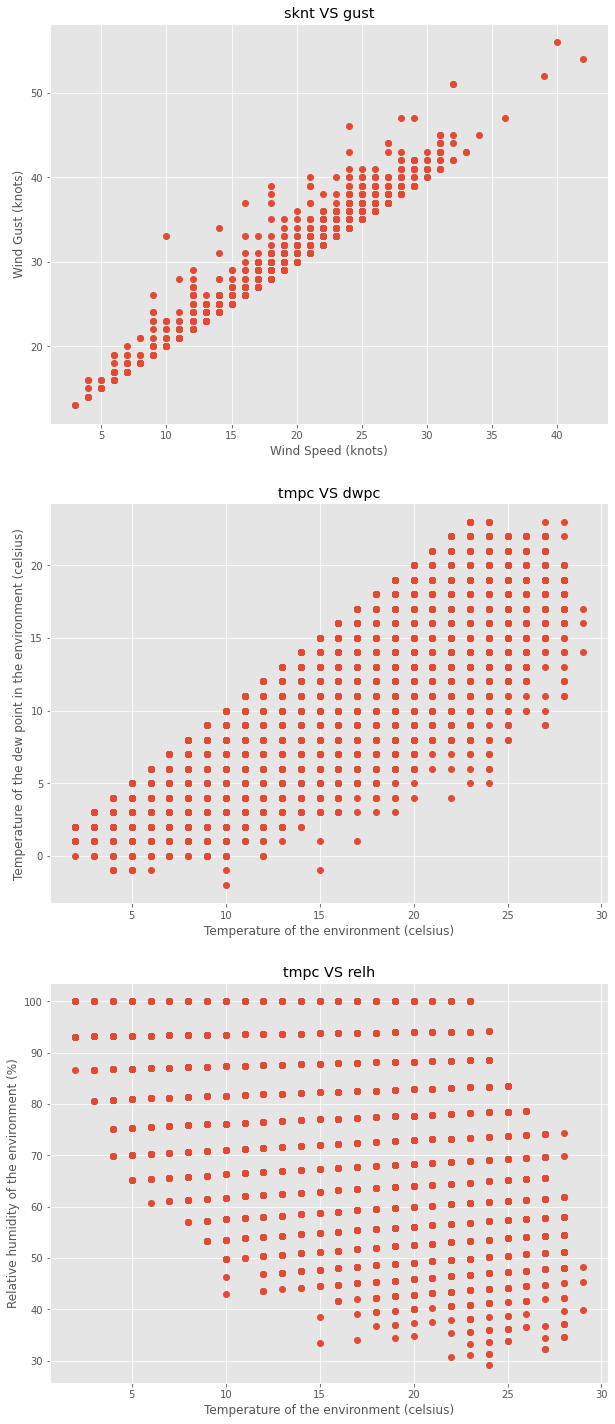

In [173]:
plt.style.use("ggplot")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, squeeze=True)

ax1.plot(dataset["sknt"], dataset["gust"], "o")
ax1.set_title("sknt VS gust")
ax1.set_xlabel("Wind Speed (knots)")
ax1.set_ylabel("Wind Gust (knots)")

ax2.plot(dataset["tmpc"], dataset["dwpc"], "o")
ax2.set_title("tmpc VS dwpc")
ax2.set_xlabel("Temperature of the environment (celsius)")
ax2.set_ylabel("Temperature of the dew point in the environment (celsius)")

ax3.plot(dataset["tmpc"], dataset["relh"], "o")
ax3.set_title("tmpc VS relh")
ax3.set_xlabel("Temperature of the environment (celsius)")
ax3.set_ylabel("Relative humidity of the environment (%)")

fig.set_size_inches(10,25)

fig.show()

The above plots are the top 3 correlation coefficient pairs of variables. From the first plot, we can see there is a strong increasing linear relationship between wind speed and wind gust. As wind speed increases, wind gust increases. The scatter looks constant. The second plot is the temperature of the dew point in the environment versus the temperature of the environment. Looking at the plot, we see a moderate-to-strong increasing relationship between the two variables — the higher temperature of the dew point in the environment, the higher temperature of the environment. The scatter looks less constant than the first plot (lower correlation coefficient, weaker relationship). The third plot also has increasing relationships between the variables. However, their relationship is pretty weak, and the scatter looks non-constant (correlation coefficient less than 0.5). 

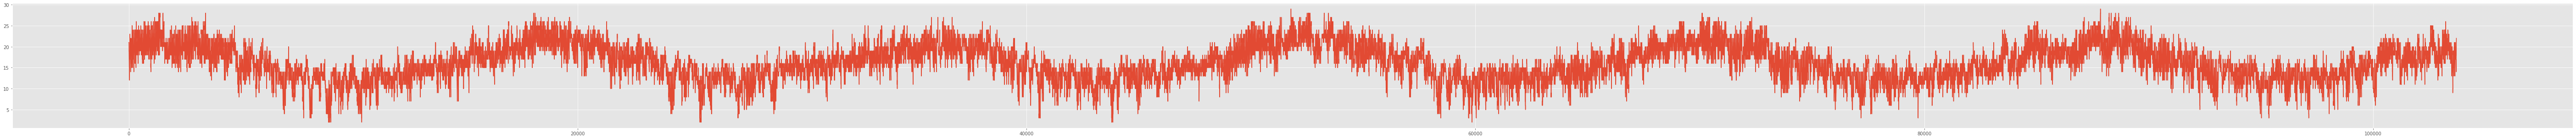

In [174]:
# plot of "tmpc" changes over time
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(5)
plt.plot(dataset["tmpc"])
plt.show()

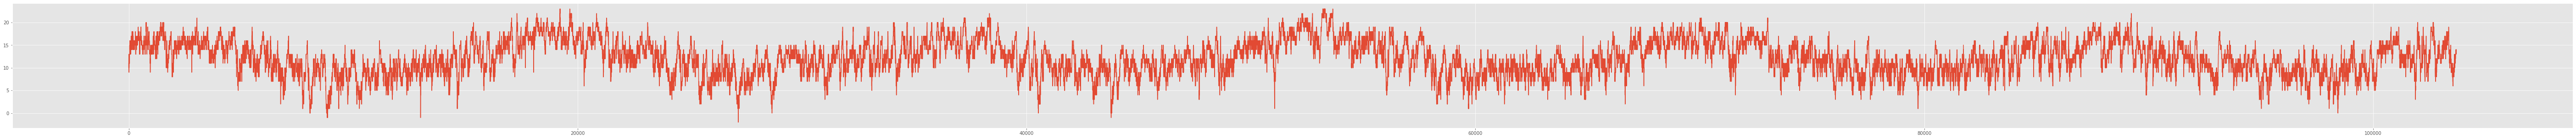

In [175]:
# plot of "dwpc" changes over time
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(5)
plt.plot(dataset["dwpc"])
plt.show()

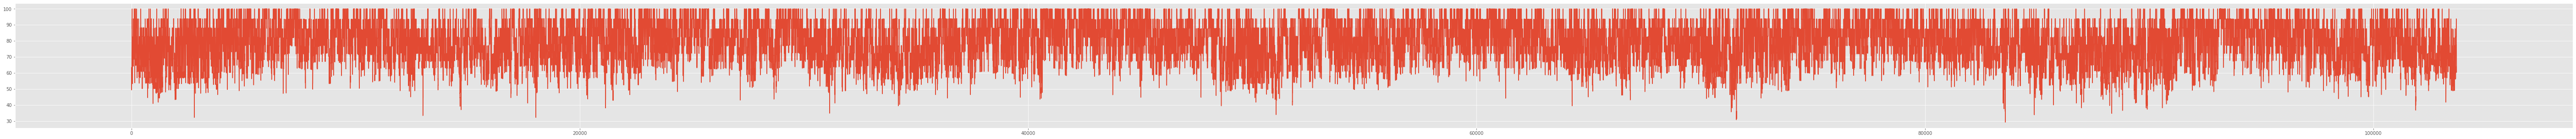

In [190]:
# plot of "dwpc" changes over time
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(5)
plt.plot(dataset["relh"])
plt.show()

From the two plots, we can see that there is an apparent seasonal effect with the temperature. There appears to be a flat trend in the data for both temperature of the environment and the temperature of the dew point in the environment. In addition, the seasonal effect for "tmpc" and "dwpc" are the same. 

# Data Processing

In [176]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
dataset.drop(columns=["valid", " station", "peak_wind_drct"], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt,gust
0,21.0,11.0,52.77,15.0,NaN
1,21.0,10.0,49.37,16.0,NaN
2,21.0,12.0,56.38,16.0,NaN
3,21.0,13.0,60.21,16.0,NaN
4,21.0,12.0,56.38,16.0,NaN


We do not need the "peak_wind_drct" as all the values in this column are null values. "valid" column is the date and time of capture, and "station" is Acronym for the place of data capture, which are both useless for training.  

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   dwpc    103678 non-null  float64
 2   relh    103593 non-null  float64
 3   sknt    103704 non-null  float64
 4   gust    1203 non-null    float64
dtypes: float64(5)
memory usage: 4.0 MB


From the information table we can see there are 103713 rows in the dataset. However, "gust" only has 1203 non-null entries. Hence, I choose to drop "gust" column as there are too many values missing. 

In [178]:
dataset.drop(columns=["gust"], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [179]:
dataset.dropna()
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   dwpc    103678 non-null  float64
 2   relh    103593 non-null  float64
 3   sknt    103704 non-null  float64
dtypes: float64(4)
memory usage: 3.2 MB


Pandas Dataframe dropna() function is used for droping all null/NA values from the dataframe. After we removed all null values in the dataset, there is no undefined in the dataset. So we can start making the training and testing data. 

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[["tmpc", "dwpc", "sknt"]], dataset["relh"], test_size=0.2)

In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 16638 to 98073
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82943 non-null  float64
 1   dwpc    82943 non-null  float64
 2   sknt    82963 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


In [183]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 42076 to 35792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20735 non-null  float64
 1   dwpc    20735 non-null  float64
 2   sknt    20741 non-null  float64
dtypes: float64(3)
memory usage: 648.2 KB


In [184]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 82970 entries, 16638 to 98073
Series name: relh
Non-Null Count  Dtype  
--------------  -----  
82875 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [185]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20743 entries, 42076 to 35792
Series name: relh
Non-Null Count  Dtype  
--------------  -----  
20718 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB


# Data Modelling

In [186]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# In this case, a dataset with 10 inputs is used with one output.

X, y = make_regression(n_samples=10000, n_features=100, noise=100)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

In [187]:
# Fit a model

model = LinearRegression()
model.fit(trainX, trainY)

LinearRegression()

In [188]:
model.score(testX, testY)

0.708106185649555

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.

I am interested in using the temperature of the environment, the temperature of the dew point in the environment and wind speed to predict the relative humidity of the environment. <br>
Before splitting the datasets into training and testing sets (80%/20%), I modified the data to ensure there is no incomplete or NA in the data. After training the model using the training dataset, I tested the model's accuracy using the testing set. The Linear Regression model has a score of 0.7958, which indicates the use of the model is a good approach for predicting the relative humidity of the environment. Therefore we can conclude that the relative humidity of the environment depends on the values of the temperature, temperature of the dew point and the wind speed of the environment. <br>
Temperature is usually low at midnight, decreasing in the early morning hours, then increasing rapidly until just after midday. It then decreases during the night. On the opposite side, relative humidity is usually high at midnight and drops rapidly in the early morning after the sun rises until it is lowest just after midday. It then increases again to midnight, rapidly in the late afternoon and early evening and levels off around midnight. That is as the temperature increases the relative humidity usually decreases or vice versa.